# Moosic, ML Project how to create a playlist out of 5000 songs for Moosic
[Linktext](https://https://learn.wbscodingschool.com/courses/ds-ai/lessons/%F0%9F%8F%97-algorithm-k-means/)

# Preperation

In [1]:
import pandas as pd
import os

try:
    # 🔹 Update this path to where your CSV is saved
    file_path = "/Users/asliozdemirstrollo/Documents/Documents/ML/Moosic Data 10 Songs/spotify_5000_songs.csv"

    # Check if the file exists at the specified path
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file was not found at the specified path: {file_path}")

    # Load the CSV file into a Pandas DataFrame
    print("Loading data...")
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")

    # Display first 5 rows
    print("\nFirst 5 rows of the data:")
    print(df.head())

except FileNotFoundError as fnfe:
    print(f"Error: {fnfe}")
    print("Please check if the file path is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loading data...
Data loaded successfully.

First 5 rows of the data:
   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

  name                                                                                                                                                                               \
0  Se Eu Quiser Falar Com Deus                   ...                                                                                                                                  
1  Saudade De Bahia                              ...                                                                                                                                  
2  Canta Canta, Minha Gente                      ...                                                                                                                                  
3  Mulher Eu Sei                                 ...                                            

# Explore

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   Unnamed: 0                                                                                                                                                                         5235 non-null   int64  
 1   name                                                                                                                                                                               5235 non-null   object 
 2   artist                                                  

In [3]:
print(df.columns) # columnames included space, which has to be cleaned

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


## Explore and cleaning

In [4]:
# 1. cleaning columnnames
df.columns = df.columns.str.strip()

#   1.1 quick check
print(df.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')


### assuming to drop

In [5]:
# assuming to drop (Asli)
##songs_df_original = songs_df.copy()
##songs_df = songs_df.drop(columns=["key", "time_signature"])

### drop unnecessary and seperate important columns

In [6]:
# List of columns to keep for song information
info_columns = ['name', 'artist', 'id', 'html']

# Define the numeric columns for analysis.
# We will remove the info columns and other irrelevant columns.
columns_to_drop = info_columns + ['Unnamed: 0', 'key', 'mode', 'time_signature', 'type']
numeric_columns = [col for col in df.columns if col not in columns_to_drop]

# Create the two separate DataFrames
song_info_df = df[info_columns]
song_numeric_df = df[numeric_columns]

# Display the first 5 rows of each DataFrame to confirm the separation
print("\nFirst 5 rows of the Numeric DataFrame (for analysis):")
print(song_numeric_df.head())

print("\nFirst 5 rows of the Info DataFrame (for later evaluation):")
print(song_info_df.head())


First 5 rows of the Numeric DataFrame (for analysis):
   danceability  energy  loudness  speechiness  acousticness  \
0         0.658  0.2590   -13.141       0.0705         0.694   
1         0.742  0.3990   -12.646       0.0346         0.217   
2         0.851  0.7300   -11.048       0.3470         0.453   
3         0.705  0.0502   -18.115       0.0471         0.879   
4         0.651  0.1190   -19.807       0.0380         0.916   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000059     0.975    0.306  110.376       256213  
1          0.000002     0.107    0.693  125.039       191867  
2          0.000063     0.124    0.905   93.698       152267  
3          0.000041     0.386    0.524  106.802       186227  
4          0.000343     0.104    0.402  120.941       273680  

First 5 rows of the Info DataFrame (for later evaluation):
                                                name  \
0  Se Eu Quiser Falar Com Deus                   ...   
1  Saudade

In [7]:
song_numeric_df.isnull().sum() # checking null values

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

Make a temporary copy which can be used to scale

In [8]:
# Temporary copy to scaling
song_numeric_df_cleaned = song_numeric_df

### Heat-Map (before scaling)

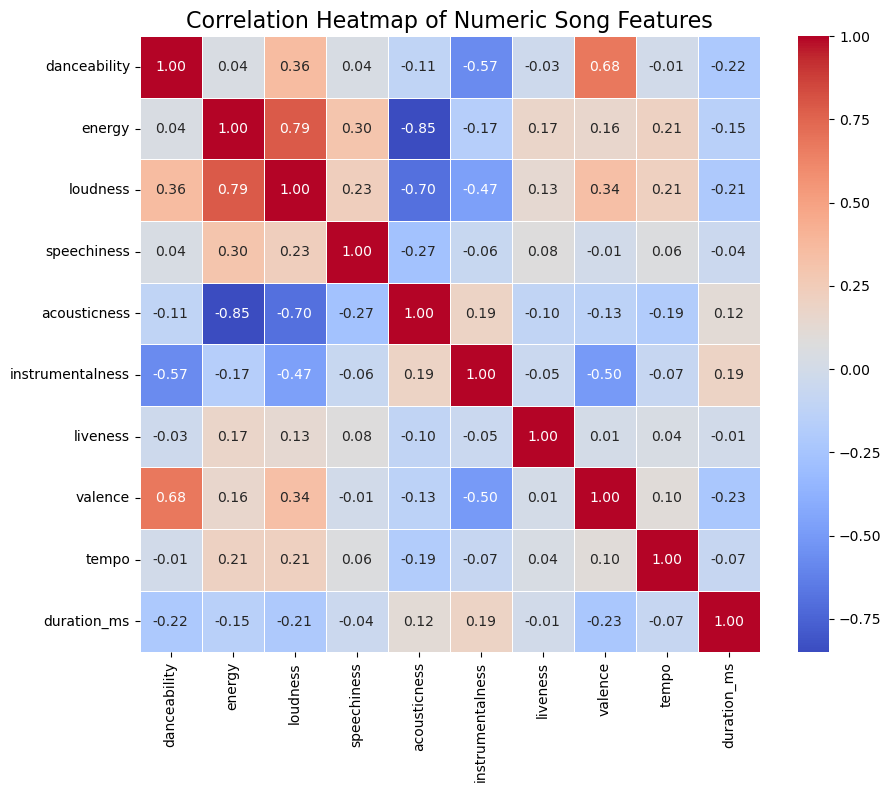

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = song_numeric_df.corr()

# Set up the matplotlib figure for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn, with annotations and a coolwarm color map
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    annot_kws={"size": 10}
)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Numeric Song Features', fontsize=16)

# Display the plot
plt.show()

result of the Heat-Map


In [10]:
# result of Heat-Map:
# 1. valence und danceability = 0.68,
# 2. energy und loudness = 0.79,
# 3. acousticness und energy = -0.85,
# 4. loudness und acousticness = -0.7

# After teammeeting we decided hold on to working with all dimensions.

### scatter plot to compare features

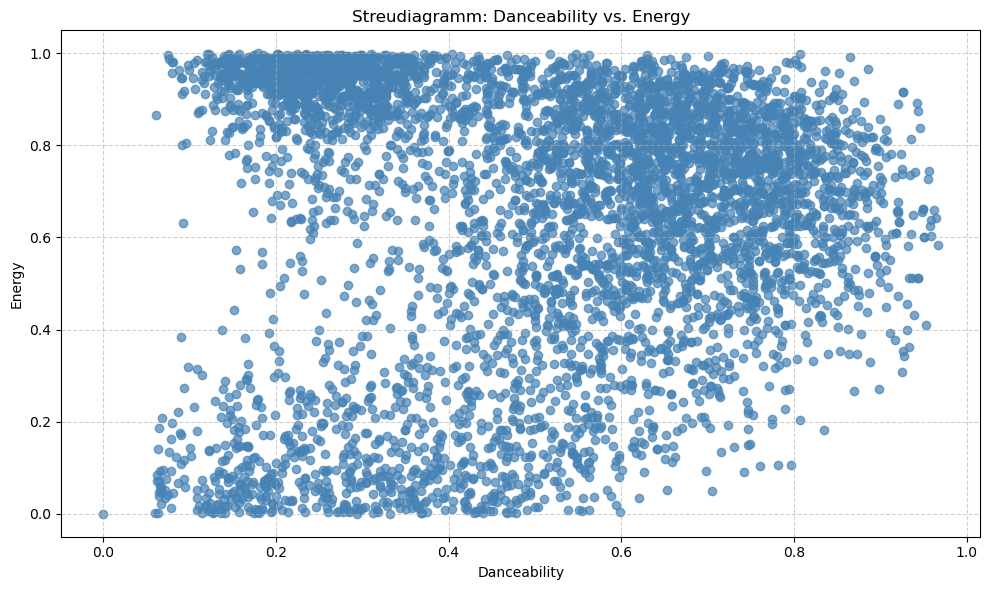

In [11]:
feature1 = 'danceability'
feature2 = 'energy'

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[feature1], df[feature2], alpha=0.7, color='steelblue')
plt.title(f'Streudiagramm: {feature1.capitalize()} vs. {feature2.capitalize()}')
plt.xlabel(feature1.capitalize())
plt.ylabel(feature2.capitalize())
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Scaling

## Scale by Standard-Scaler

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#----------------
# Drop the 'loudness' column to reduce multicollinearity
song_numeric_df_cleaned = song_numeric_df # .drop('loudness', axis=1) We decided to leave cause it's getting probably droped by PCA
print("Numeric DataFrame after dropping 'loudness':")
print(song_numeric_df_cleaned.head())
print("-" * 50)
#----------------

# Prepare my tool (Initialize) the StandardScaler to scale the numeric data
scaler = StandardScaler()

# Fit (learns from the data and calculate the mean) and transform (use the calculation and transform the data with it) the data
song_numeric_df_scaled = scaler.fit_transform(song_numeric_df_cleaned)

# Convert the scaled data back to a DataFrame for easier handling
song_numeric_df_scaled = pd.DataFrame(song_numeric_df_scaled, columns=song_numeric_df_cleaned.columns)

print("\nFirst 5 rows of the Scaled DataFrame:")
print(song_numeric_df_scaled.head())
print("-" * 50)

Numeric DataFrame after dropping 'loudness':
   danceability  energy  loudness  speechiness  acousticness  \
0         0.658  0.2590   -13.141       0.0705         0.694   
1         0.742  0.3990   -12.646       0.0346         0.217   
2         0.851  0.7300   -11.048       0.3470         0.453   
3         0.705  0.0502   -18.115       0.0471         0.879   
4         0.651  0.1190   -19.807       0.0380         0.916   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000059     0.975    0.306  110.376       256213  
1          0.000002     0.107    0.693  125.039       191867  
2          0.000063     0.124    0.905   93.698       152267  
3          0.000041     0.386    0.524  106.802       186227  
4          0.000343     0.104    0.402  120.941       273680  
--------------------------------------------------

First 5 rows of the Scaled DataFrame:
   danceability    energy  loudness  speechiness  acousticness  \
0      0.681116 -1.368556 -0.604187 

## Scale by QT

In [13]:
from sklearn.preprocessing import QuantileTransformer

# Let's create a sample DataFrame to make the example runnable
data = song_numeric_df_cleaned
df_preprocessed = pd.DataFrame(data)

# --- Apply the QuantileTransformer ---

# 1. Instantiate the transformer
# 'output_distribution' can be set to 'uniform' or 'normal'.
# 'uniform' maps data to a uniform distribution (0 to 1).
# 'normal' maps data to a standard normal distribution (mean=0, variance=1).
# 'normal' is often better for algorithms that assume normally distributed data (like K-Means).
qt = QuantileTransformer(output_distribution='normal', random_state=42) # random_state=42 TEAM VALUE

# 2. Fit the transformer to the data and transform it
# We are selecting the numerical features to transform.
# The 'fit' step learns the quantiles from the data.
# The 'transform' step applies the learned quantiles to scale the data.
df_scaled_by_qt = qt.fit_transform(df_preprocessed)

# The result 'df_scaled_by_qt' is a NumPy array.
# You might want to convert it back to a Pandas DataFrame for easier handling,
# keeping the original column names.
df_scaled_by_qt = pd.DataFrame(df_scaled_by_qt, columns=df_preprocessed.columns)

# You can now proceed with your clustering algorithm (e.g., KMeans)
# using this scaled DataFrame.

print("Original data head:")
print(df_preprocessed.head())
print("\nScaled data head:")
print(df_scaled_by_qt.head())

Original data head:
   danceability  energy  loudness  speechiness  acousticness  \
0         0.658  0.2590   -13.141       0.0705         0.694   
1         0.742  0.3990   -12.646       0.0346         0.217   
2         0.851  0.7300   -11.048       0.3470         0.453   
3         0.705  0.0502   -18.115       0.0471         0.879   
4         0.651  0.1190   -19.807       0.0380         0.916   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000059     0.975    0.306  110.376       256213  
1          0.000002     0.107    0.693  125.039       191867  
2          0.000063     0.124    0.905   93.698       152267  
3          0.000041     0.386    0.524  106.802       186227  
4          0.000343     0.104    0.402  120.941       273680  

Scaled data head:
   danceability    energy  loudness  speechiness  acousticness  \
0      0.529301 -1.053106 -0.888309     0.293986      0.810910   
1      0.971436 -0.817352 -0.828685    -1.012474      0.279649   


## PCA QT


Explained variance ratio of the principal components:
[0.44906233 0.17190533]
--------------------------------------------------


/var/folders/xn/tw0sz0nx6dv2wmn3xgpg0s0r0000gn/T/ipykernel_11262/2206443452.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


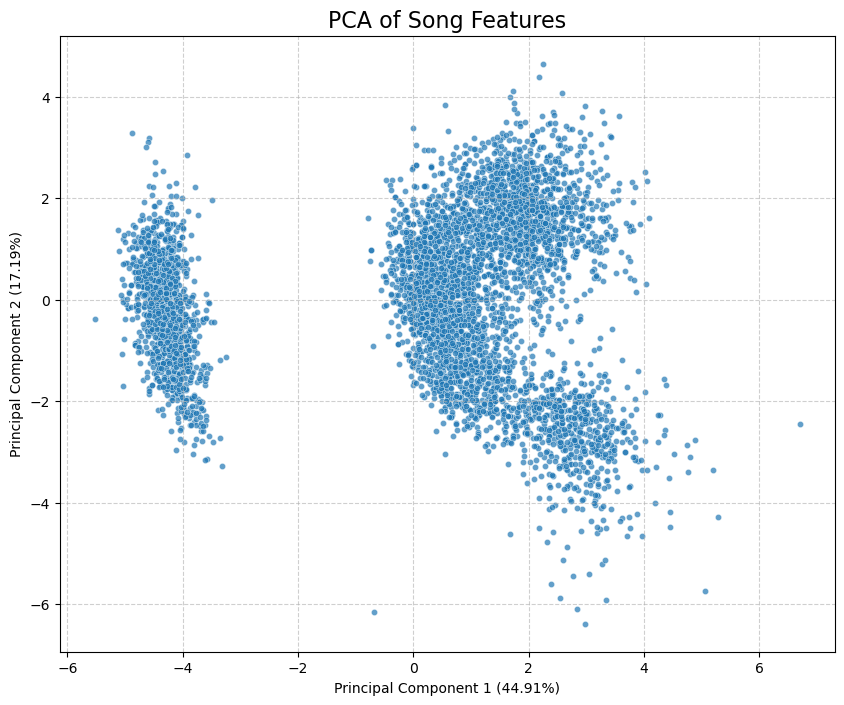

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_by_qt)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Print the explained variance ratio of the components
print("\nExplained variance ratio of the principal components:")
print(pca.explained_variance_ratio_)
print("-" * 50)

# Visualize the PCA results in a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    palette='viridis',
    s=20,
    alpha=0.7
)
plt.title('PCA of Song Features', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [15]:
# Create a DataFrame for the principal components with the new name
pca_df_qt = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Print the new DataFrame name
print("Der DataFrame für die PCA-Ergebnisse wurde als 'pca_df_qt' gespeichert.")
print(pca_df_qt.head())

Der DataFrame für die PCA-Ergebnisse wurde als 'pca_df_qt' gespeichert.
        PC1       PC2
0  0.731781 -0.989310
1  0.084299 -1.302654
2 -0.041346 -0.007085
3  0.523569 -2.153589
4  0.949258 -2.324138


In [16]:
song_numeric_df_scaled.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

## PCA

### Dimensions reduction and Visu with Scatter_Plot


Explained variance ratio of the principal components:
[0.33001878 0.1891544 ]
--------------------------------------------------


/var/folders/xn/tw0sz0nx6dv2wmn3xgpg0s0r0000gn/T/ipykernel_11262/2042586587.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


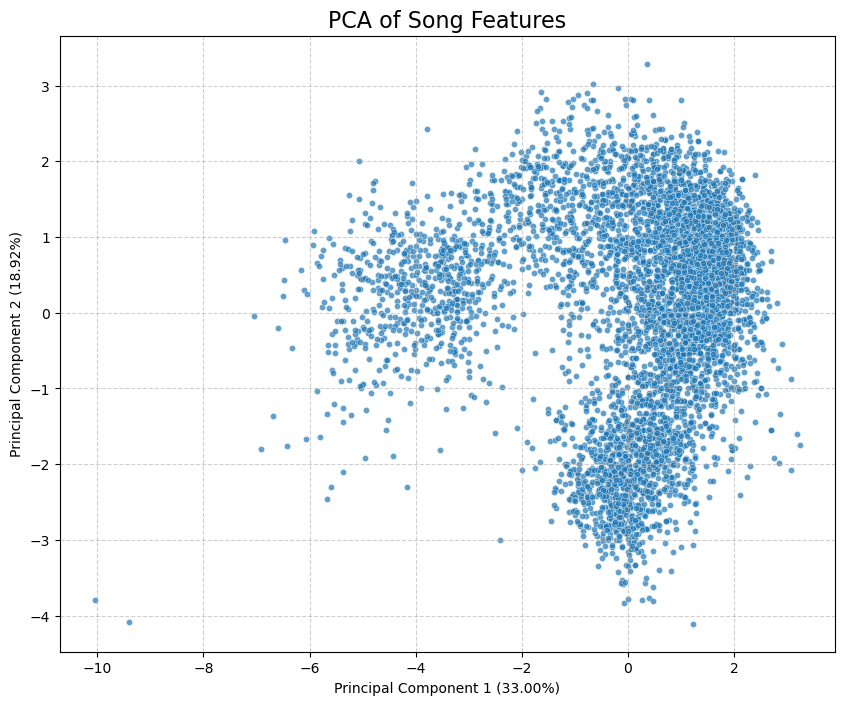

In [17]:
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(song_numeric_df_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Print the explained variance ratio of the components
print("\nExplained variance ratio of the principal components:")
print(pca.explained_variance_ratio_)
print("-" * 50)

# Visualize the PCA results in a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    palette='viridis',
    s=20,
    alpha=0.7
)
plt.title('PCA of Song Features', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Further exploration with n_components=0.95


In [18]:
# PCA with the goal of explaining 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(song_numeric_df_scaled)

# Creating a new DataFrame with the reduced dimensions
# We name the columns as PC1, PC2, etc.
pc_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# Printing the number of resulting principal components
print(f"The number of principal components that explain 95% of the variance is: {pca.n_components_}")

# Printing the first 5 rows of the new DataFrame
print("\nThe first 5 rows of the DataFrame after PCA:")
print(pca_df.head())

The number of principal components that explain 95% of the variance is: 8

The first 5 rows of the DataFrame after PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.670003  0.632285  4.248649  3.530464 -0.488097  0.235186 -0.529426   
1  0.224883  1.811819 -0.554955  0.123690  0.138523 -0.094015  0.108675   
2  1.635377  1.284770  1.119879 -1.855032 -1.569564  2.912589  0.878950   
3 -1.621089  2.429291  1.336726  1.297214 -0.596599  0.411892 -0.339019   
4 -2.149695  2.233468 -0.202093  0.314035  0.190662  0.676928 -0.669449   

        PC8  
0  0.874169  
1  0.186159  
2 -0.469912  
3  0.310896  
4  0.236558  


### K-Distance

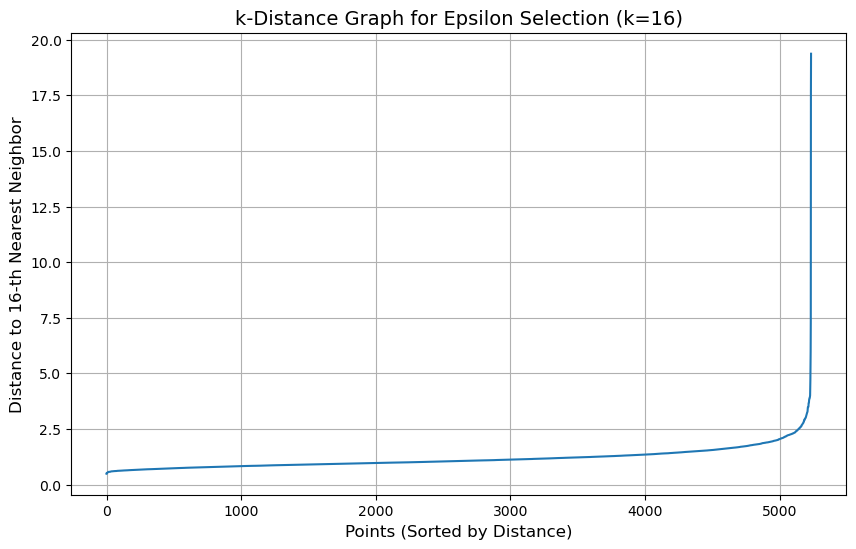

In [19]:
from sklearn.neighbors import NearestNeighbors

# The number of dimensions is 8, so we'll use 2 * 8 = 16 as a starting point.
# We can change this number and see how it affects the graph.
min_samples = 16

# We assume that 'pca_df' is your final DataFrame from the previous step with the 8 components.
df_to_cluster = pca_df.copy()

# Find the nearest neighbors for each data point
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_to_cluster)
distances, indices = neighbors_fit.kneighbors(df_to_cluster)

# Sort distances and plot the k-distance graph
distances = np.sort(distances[:, min_samples - 1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points (Sorted by Distance)', fontsize=12)
plt.ylabel(f'Distance to {min_samples}-th Nearest Neighbor', fontsize=12)
plt.title(f'k-Distance Graph for Epsilon Selection (k={min_samples})', fontsize=14)
plt.grid(True)
plt.show()


# Clustering

## DBSCAN Standard Scaler

Number of clusters found: 2
Number of noise points: 74


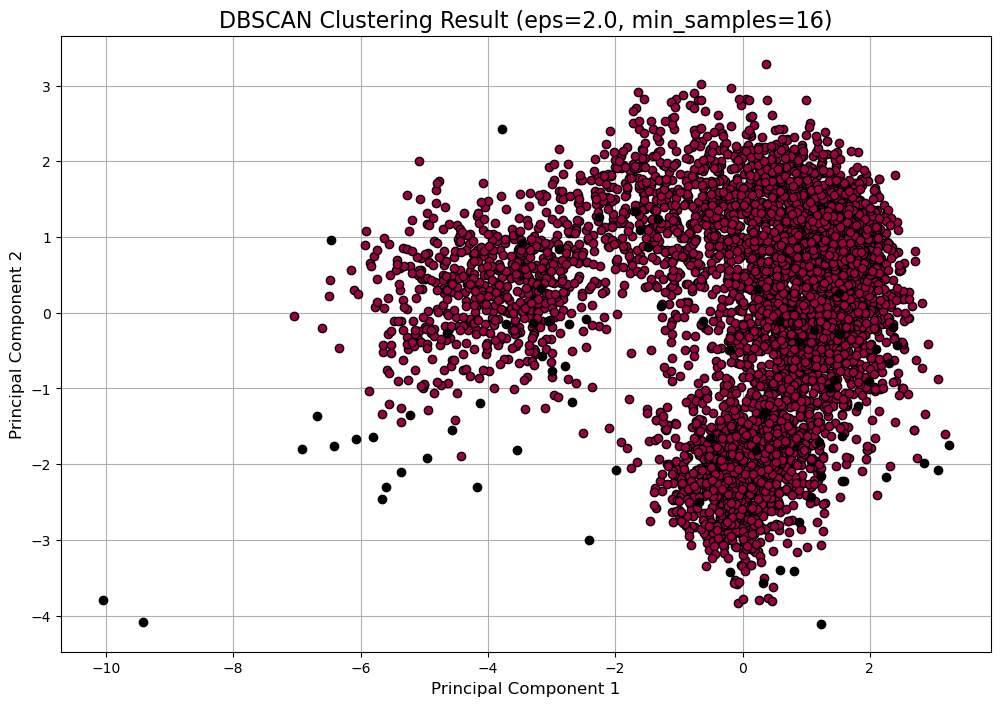

In [20]:
from sklearn.cluster import DBSCAN

# We define our optimal parameters based on the visual inspection of the k-distance graph.
epsilon = 2.0
min_samples = 16

# We assume that 'pca_df' is your final DataFrame from the previous step with the 8 components.
# This is the DataFrame we'll perform the clustering on.
df_to_cluster = pca_df.copy()

# Execute the DBSCAN algorithm
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df_to_cluster['cluster'] = dbscan.fit_predict(df_to_cluster)

# Count the number of clusters found and noise
n_clusters = len(set(df_to_cluster['cluster'])) - (1 if -1 in df_to_cluster['cluster'] else 0)
n_noise = list(df_to_cluster['cluster']).count(-1)

print(f'Number of clusters found: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Visualization of the clusters
# We'll use the first two principal components for visualization
plt.figure(figsize=(12, 8))
# Get unique cluster labels
unique_labels = set(df_to_cluster['cluster'])
# Choose a colormap for the clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise points
        col = [0, 0, 0, 1]

    class_member_mask = (df_to_cluster['cluster'] == k)

    xy = df_to_cluster[class_member_mask]
    # We use the first two columns of the DataFrame for the plot (PC1 and PC2)
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN Clustering Result (eps={epsilon}, min_samples={min_samples})', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.show()


### KMeans test (with Standard_Scaler)

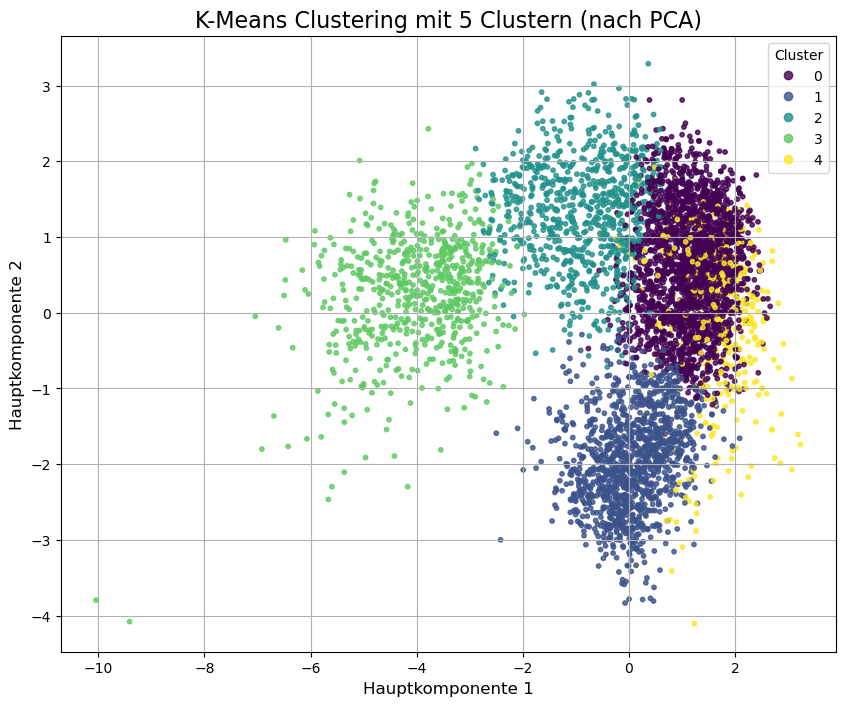

In [21]:
from sklearn.cluster import KMeans

# Test variable
df_with_features = song_numeric_df_scaled

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_with_features)

# K-Means five
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # random_state=42 TEAM VALUE
clusters = kmeans.fit_predict(scaled_data)

# Vizu
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.8)
plt.title(f'K-Means Clustering mit {n_clusters} Clustern (nach PCA)', fontsize=16)
plt.xlabel('Hauptkomponente 1', fontsize=12)
plt.ylabel('Hauptkomponente 2', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

## Scale with Quantile-Transformer

In [22]:
# Create a QuantileTransformer object
##scaler = QuantileTransformer()

# Transform the foods_df DataFrame
##with_age_quantile = scaler.fit_transform(foods_df)

In [23]:
from sklearn.preprocessing import QuantileTransformer

# Let's create a sample DataFrame to make the example runnable
data = song_numeric_df_cleaned
df_preprocessed = pd.DataFrame(data)

# --- Apply the QuantileTransformer ---

# 1. Instantiate the transformer
# 'output_distribution' can be set to 'uniform' or 'normal'.
# 'uniform' maps data to a uniform distribution (0 to 1).
# 'normal' maps data to a standard normal distribution (mean=0, variance=1).
# 'normal' is often better for algorithms that assume normally distributed data (like K-Means).
qt = QuantileTransformer(output_distribution='normal', random_state=42) # random_state=42 TEAM VALUE

# 2. Fit the transformer to the data and transform it
# We are selecting the numerical features to transform.
# The 'fit' step learns the quantiles from the data.
# The 'transform' step applies the learned quantiles to scale the data.
df_scaled_by_qt = qt.fit_transform(df_preprocessed)

# The result 'df_scaled_by_qt' is a NumPy array.
# You might want to convert it back to a Pandas DataFrame for easier handling,
# keeping the original column names.
df_scaled_by_qt = pd.DataFrame(df_scaled_by_qt, columns=df_preprocessed.columns)

# You can now proceed with your clustering algorithm (e.g., KMeans)
# using this scaled DataFrame.

print("Original data head:")
print(df_preprocessed.head())
print("\nScaled data head:")
print(df_scaled_by_qt.head())

Original data head:
   danceability  energy  loudness  speechiness  acousticness  \
0         0.658  0.2590   -13.141       0.0705         0.694   
1         0.742  0.3990   -12.646       0.0346         0.217   
2         0.851  0.7300   -11.048       0.3470         0.453   
3         0.705  0.0502   -18.115       0.0471         0.879   
4         0.651  0.1190   -19.807       0.0380         0.916   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000059     0.975    0.306  110.376       256213  
1          0.000002     0.107    0.693  125.039       191867  
2          0.000063     0.124    0.905   93.698       152267  
3          0.000041     0.386    0.524  106.802       186227  
4          0.000343     0.104    0.402  120.941       273680  

Scaled data head:
   danceability    energy  loudness  speechiness  acousticness  \
0      0.529301 -1.053106 -0.888309     0.293986      0.810910   
1      0.971436 -0.817352 -0.828685    -1.012474      0.279649   


### Histograms

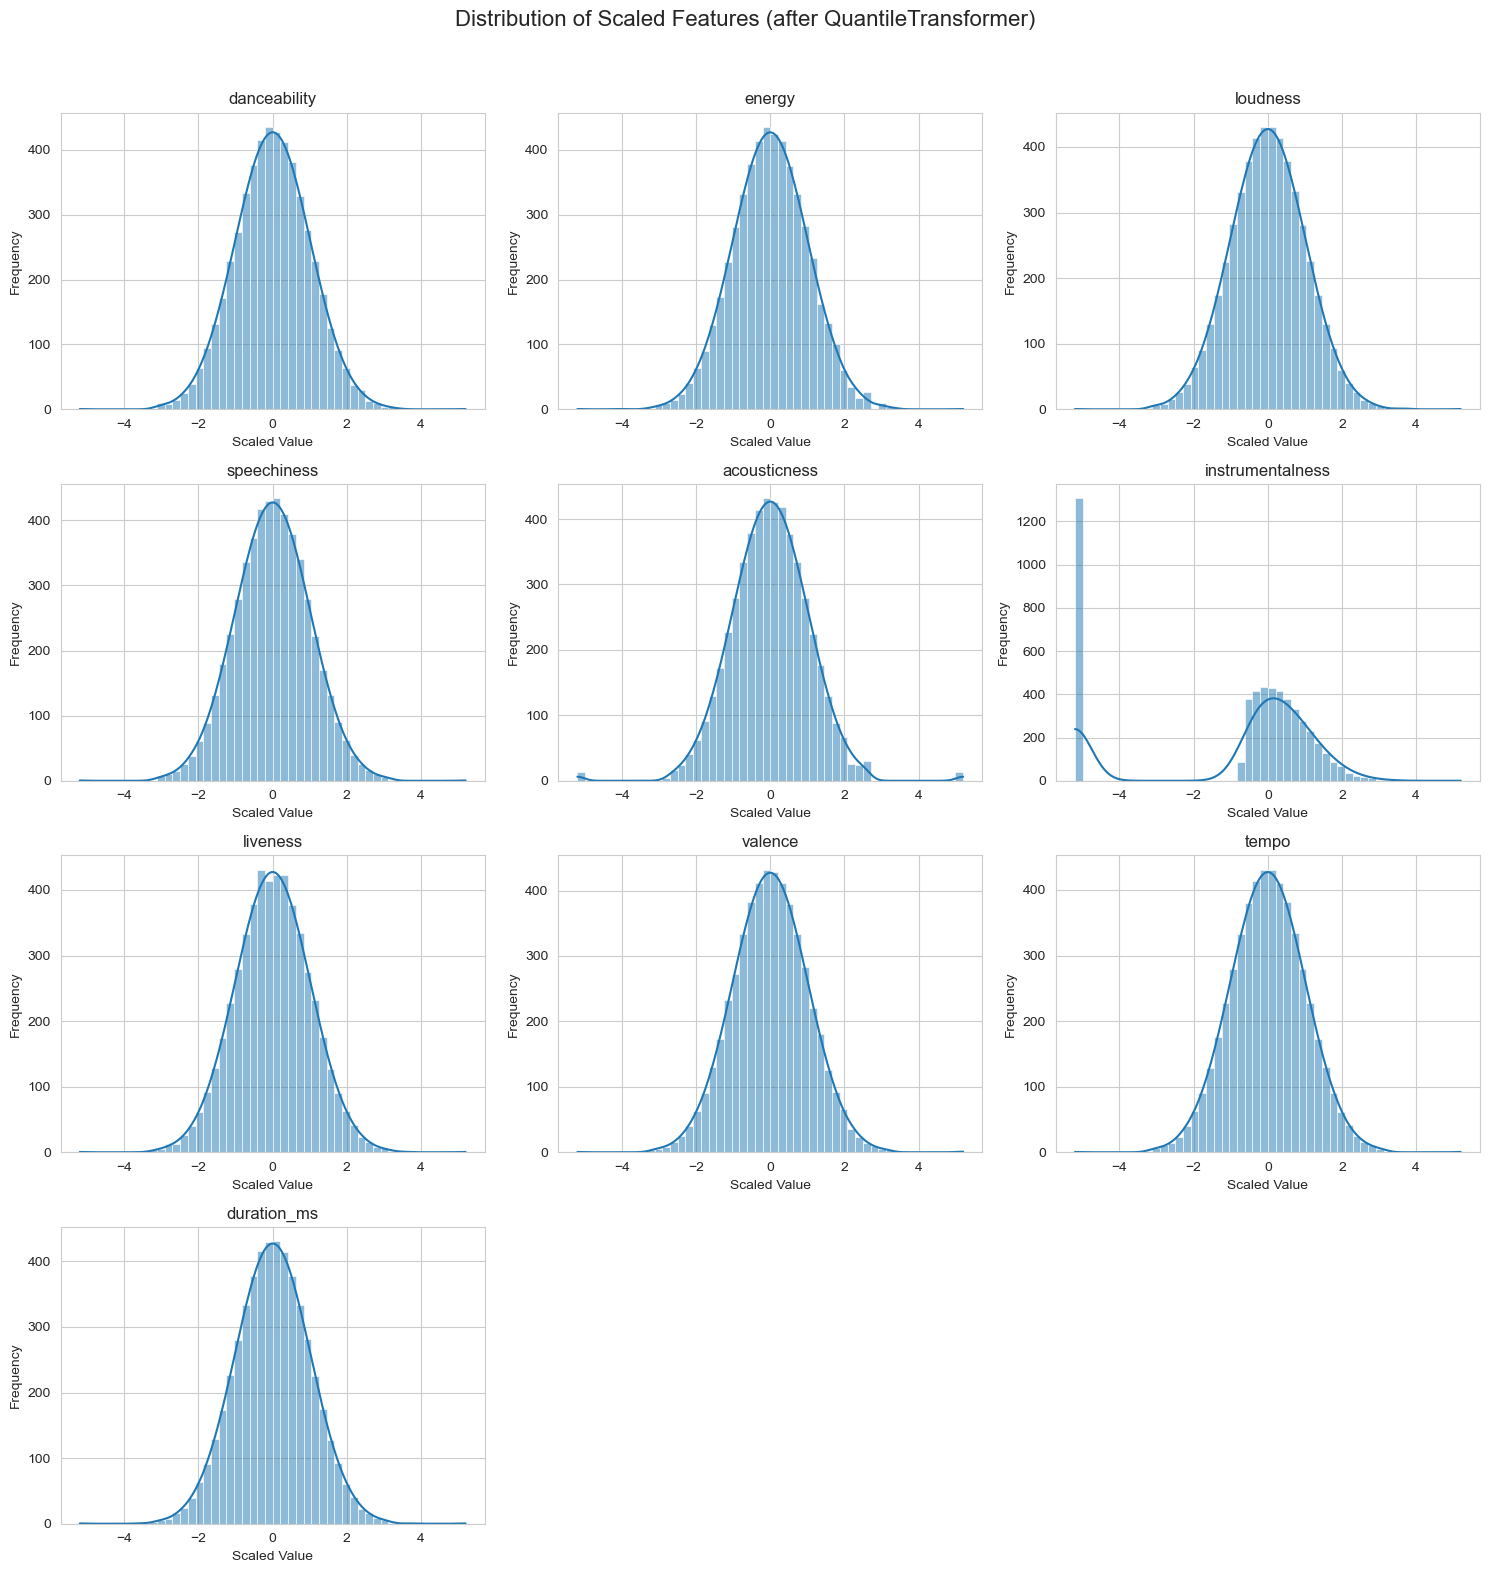

In [24]:
import math

# Estimate the results by histograms
# -----------------------------------------------------------------------
# Assuming your scaled data is in this DataFrame
# Replace with your actual DataFrame name
df_to_plot = df_scaled_by_qt # Use your correct DataFrame name

# Set a style for the plots for better readability
sns.set_style("whitegrid")

# Get the list of all column names (features) in your scaled DataFrame
scaled_features = df_to_plot.columns.to_list()
num_features = len(scaled_features)

# --- Dynamically create the subplot layout ---
# Determine the number of rows and columns based on the number of features
# We use a square-ish layout for a clean look
n_cols = 3  # You can change this number
n_rows = math.ceil(num_features / n_cols)

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle('Distribution of Scaled Features (after QuantileTransformer)', fontsize=16)

# Flatten the axes array for easy iteration, handling cases with a single row
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    # If there's only one subplot, flatten() is not needed.
    axes = [axes]


# Loop through each feature and plot its histogram
for i, feature in enumerate(scaled_features):
    sns.histplot(df_to_plot[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Scaled Value')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(num_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()


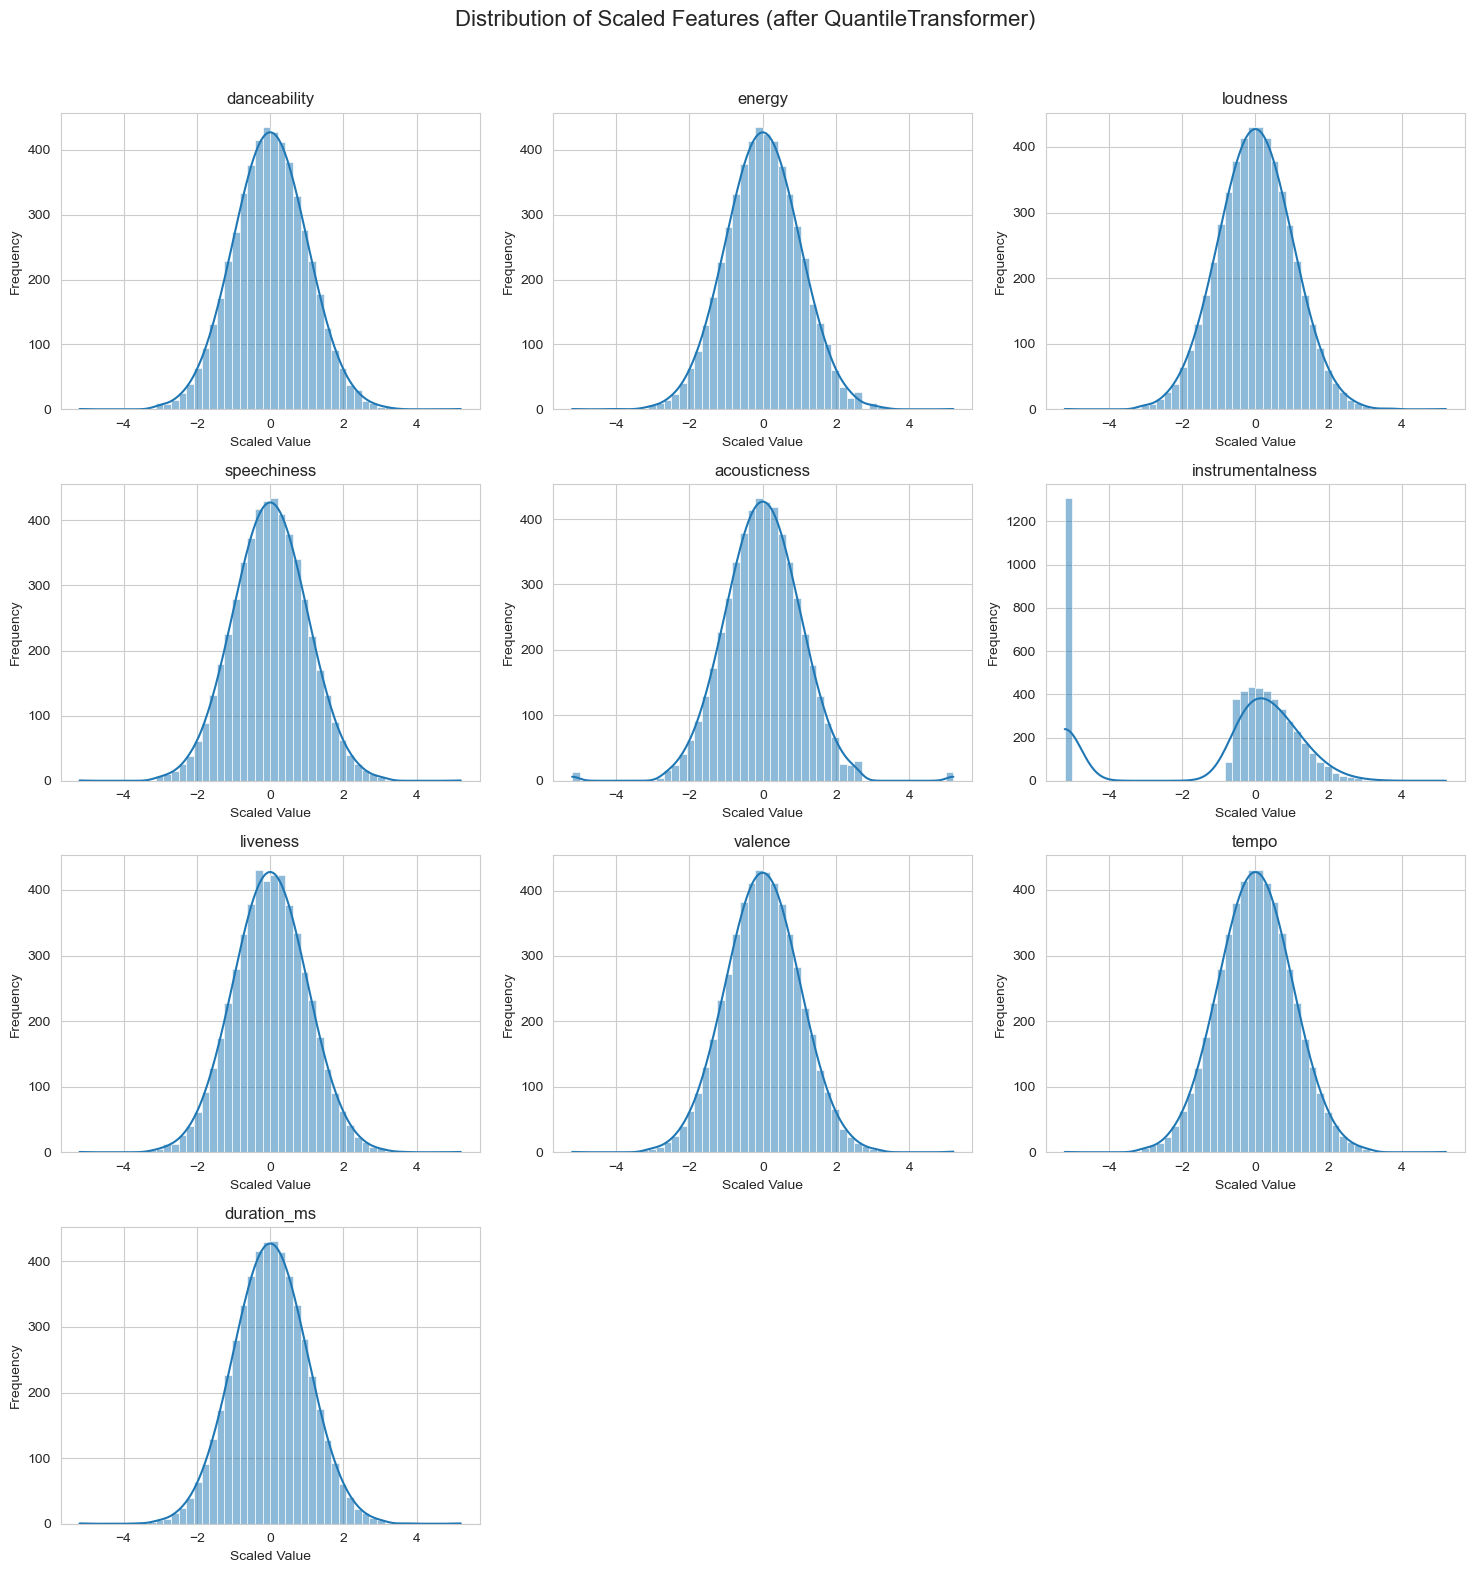

In [25]:

# Estimate the results by histograms
# -----------------------------------------------------------------------
# Use your scaled DataFrame here
df_to_plot = df_scaled_by_qt

# Set a style for the plots for better readability
sns.set_style("whitegrid")

# Get the list of all column names (features) in your scaled DataFrame
scaled_features = df_to_plot.columns.to_list()
num_features = len(scaled_features)

# --- Dynamically create the subplot layout ---
# Determine the number of rows and columns based on the number of features
# We use a square-ish layout for a clean look
n_cols = 3  # You can change this number
n_rows = math.ceil(num_features / n_cols)

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle('Distribution of Scaled Features (after QuantileTransformer)', fontsize=16)

# Flatten the axes array for easy iteration, handling cases with a single row
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    # If there's only one subplot, flatten() is not needed.
    axes = [axes]


# Loop through each feature and plot its histogram
for i, feature in enumerate(scaled_features):
    sns.histplot(df_to_plot[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Scaled Value')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(num_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 0.99, 0.96]) # Adjust layout to prevent title overlap
plt.show()

### The Elbow-Methode

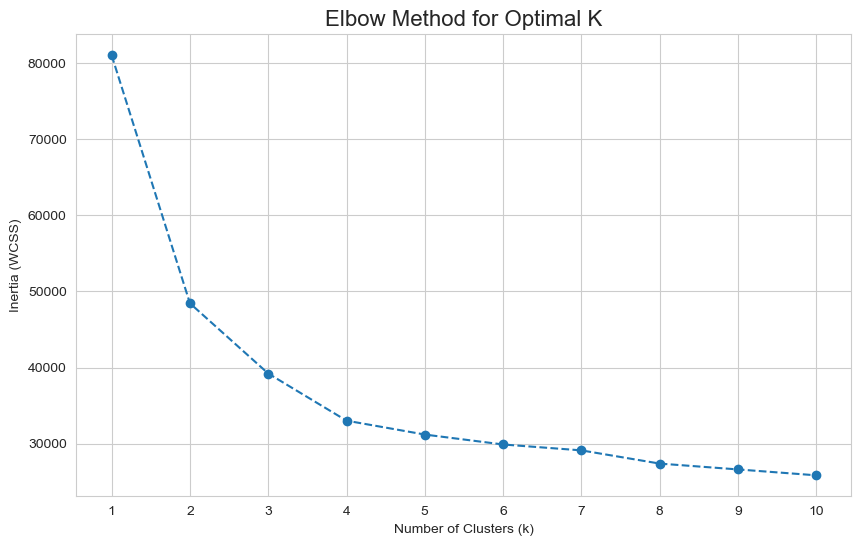

In [26]:
# WCSS (Within-Cluster Sum of Squares), also known as Inertia
# This will store the inertia for each value of k
inertia = []

# Choose a range of k values to test. A good starting point is 1 to 10.
k_range = range(1, 11)

# Loop through the range of k values and fit KMeans
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled_by_qt)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Clustering

## KMeans with Quantile-Transformer

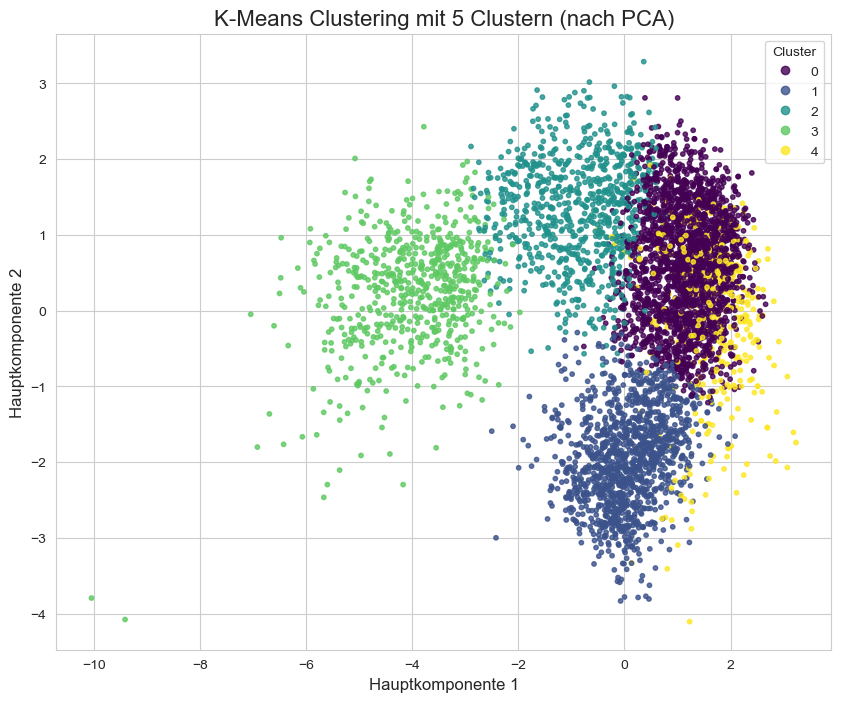

In [27]:
# Test variable
df_with_5_features = df_scaled_by_qt

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_with_features)

# K-Means five
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Vizu
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.8)
plt.title(f'K-Means Clustering mit {n_clusters} Clustern (nach PCA)', fontsize=16)
plt.xlabel('Hauptkomponente 1', fontsize=12)
plt.ylabel('Hauptkomponente 2', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

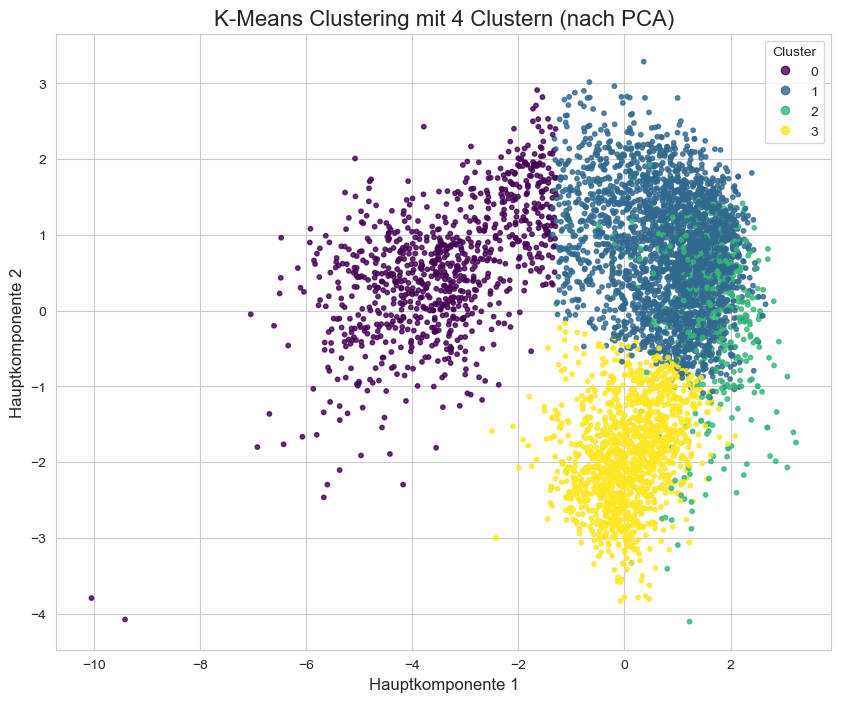

In [28]:
# Test variable
df_with_4_features = df_scaled_by_qt

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_with_features)

# K-Means five
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Vizu
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.8)
plt.title(f'K-Means Clustering mit {n_clusters} Clustern (nach PCA)', fontsize=16)
plt.xlabel('Hauptkomponente 1', fontsize=12)
plt.ylabel('Hauptkomponente 2', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

Conclusion: I used K-Means with the optimal number of clusters (k=5) to get a high-level, broad grouping of our 5000 songs. Could point to major themes or genres in our dataset, such as "Rock," "Hip-Hop," or "Chill" etc.

### storing the result and result exploration

In [29]:
# Create a copy to be safe, to a temporarily, cleaned, 5 clustered DF
song_numeric_df_cleaned_copy = song_numeric_df_cleaned.copy()

# K-Means algorithm with the optimal number of clusters
kmeans_model = KMeans(n_clusters=5, random_state=42, n_init='auto')

# Fit the model to your scaled data and get the cluster labels
cluster_labels = kmeans_model.fit_predict(df_scaled_by_qt)

# Add the cluster labels as a new column to your ORIGINAL clean DataFrame
# This is crucial for later analysis of the clusters
##song_numeric_df_cleaned.loc[:, 'cluster'] = cluster_labels

# Add the cluster labels as a new column to a copy of cleaned, 5 clustered DataFrame
# This is crucial for later analysis of the clusters
song_numeric_df_cleaned_copy.loc[:, 'cluster'] = cluster_labels

## AgglomerativeClustering (hierarchical) on every seperate K-Means cluster




Here, the DF that was previously grouped by KMeans could be further subdivided.
Basicaly it's posible to do so, if the Category isn't named. But we before move on to clustering with Agglomerative Clustering on PCA data, in two steps.

In [30]:
##from sklearn.cluster import AgglomerativeClustering
##from scipy.cluster.hierarchy import dendrogram, linkage

# --- Agglomerative Clustering apply on Cluster 0 ---
# Filter the scaled data to only include songs from cluster 0
##cluster_0_data = df_scaled_by_qt[song_numeric_df_cleaned['cluster'] == 0]

# Perform Agglomerative Clustering on this sub-cluster
# Here we can choose a different linkage method if we want, e.g., 'ward'
##agg_cluster_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')

# Fit the model to the sub-cluster data
##agg_cluster_model.fit(cluster_0_data)

# Create and plot the Dendrogram
# This helps in visualizing the sub-clusters and deciding on the number of sub-playlists
##linked = linkage(cluster_0_data, method='ward')
##plt.figure(figsize=(10, 7))
##dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
##plt.title('Dendrogram for Sub-cluster 0')
##plt.xlabel('Song Samples')
##plt.ylabel('Distance')
##plt.show()

# Based on the dendrogram, you can decide how many sub-clusters you want (e.g., 3)
# To get the final sub-cluster labels, you can re-run the model with the chosen number of clusters
##final_sub_clusters = AgglomerativeClustering(n_clusters=3, linkage='ward')
##sub_cluster_labels = final_sub_clusters.fit_predict(cluster_0_data)

# You can then add these new sub-cluster labels back to your main DataFrame
# for further analysis and for creating sub-playlists.

## AgglomerativeClustering (hierarchical) in two steps

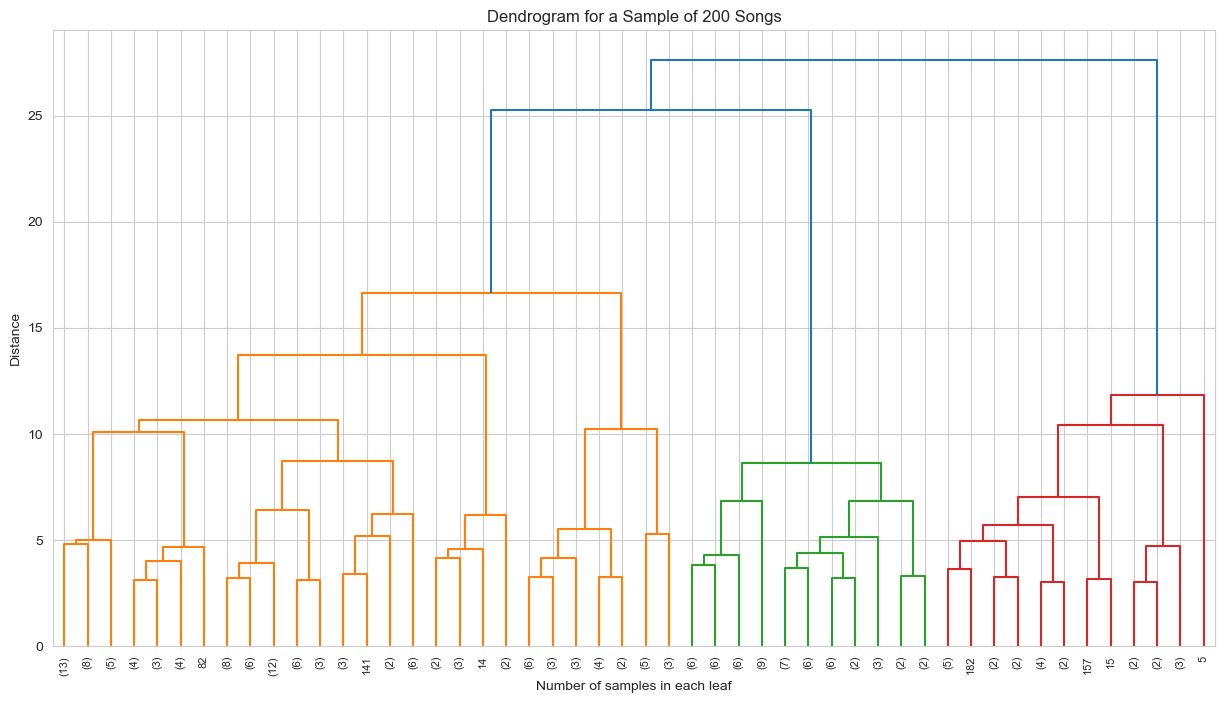

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

# Check DF PCA reduced: 'pca_df' is your DataFrame with the PCA-reduced data
# Check DF: 'song_numeric_df_cleaned' is your original DataFrame
# Replace variable names with your actual variable names

# --- FOR VISUALIZATION: Create a sample ---
# We take a sample of 200 songs to get a readable dendrogram
sample_size = 200
# Ensure the sample includes the original index for tracking
pca_df_sample = pca_df.sample(n=sample_size, random_state=42)
original_df_sample = song_numeric_df_cleaned.loc[pca_df_sample.index]

# Calculate the linkage matrix for visualization
# 'ward' is a common method to minimize the variance within clusters
linked_sample = linkage(pca_df_sample, method='ward')

# Plot the dendrogram for the sample
plt.figure(figsize=(15, 8))
dendrogram(linked_sample,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',
           p=50) # Shows only the last 50 clusters
plt.title('Dendrogram for a Sample of 200 Songs')
plt.xlabel('Number of samples in each leaf')
plt.ylabel('Distance')
plt.show()

10 or 24, the big question. I got decided to set 20 clusters and look at the result.

# Save

In [32]:
# Copy to store the new Agglomerative Clustering results
song_numeric_df_cleaned_for_agg = song_numeric_df_cleaned.copy()

In [33]:
# --- FOR FINAL CLUSTER ASSIGNMENT: Apply to all data ---
# You choose the number of clusters based on the dendrogram
# Example: If you want 20 playlists, set n_clusters=20
n_clusters_agg = 20

# Apply Agglomerative Clustering to the entire PCA dataset
agg_model = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward')

# Assign the cluster labels to the original DataFrame
agg_labels = agg_model.fit_predict(pca_df)
song_numeric_df_cleaned_for_agg.loc[:, 'agg_cluster'] = agg_labels

# Check the number of songs in each cluster
print(song_numeric_df_cleaned_for_agg['agg_cluster'].value_counts().sort_index())

agg_cluster
0     719
1     376
2     413
3     532
4     268
5     506
6     102
7     152
8      45
9     330
10      2
11    279
12    182
13    229
14    148
15    354
16    125
17     33
18    243
19    197
Name: count, dtype: int64


In [34]:
print(song_numeric_df_cleaned_for_agg['agg_cluster'].value_counts())

agg_cluster
0     719
3     532
5     506
2     413
1     376
15    354
9     330
11    279
4     268
18    243
13    229
19    197
12    182
7     152
14    148
16    125
6     102
8      45
17     33
10      2
Name: count, dtype: int64


Test the playlist after prepaire them therefore.

In [35]:
# Select a specific cluster to listen to (e.g., Cluster 0)
##cluster_to_listen_to = 0

# Filter the DataFrame for all songs belonging to that cluster
##playlist_songs = song_numeric_df_cleaned_for_agg[song_numeric_df_cleaned_for_agg['agg_cluster'] == cluster_to_listen_to]

# Display the first 10 songs from this new playlist
# Note: You need a 'track_name' and 'artist_name' column in your original DataFrame
##print(playlist_songs[['track_name', 'artist_name']].head(10))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


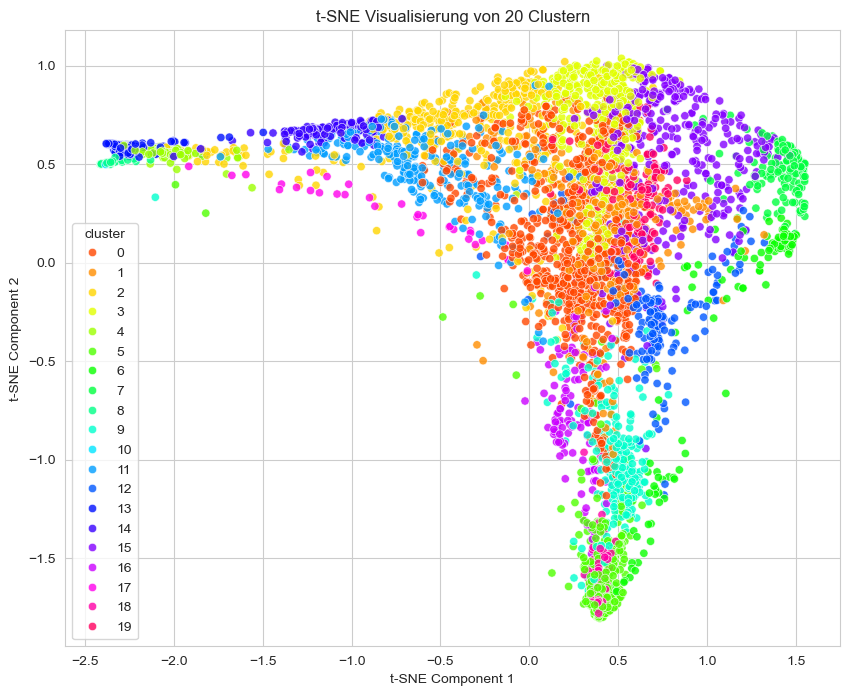

In [36]:
from sklearn.manifold import TSNE

# Set a random seed for reproducibility
# t-SNE is a stochastic algorithm, so setting a seed ensures the results are the same each time
np.random.seed(42)

# Apply t-SNE to the PCA data
# The n_components=2 parameter specifies the desired output dimension (2D)
# The perplexity parameter is a crucial hyperparameter for t-SNE
# A value between 5 and 50 is generally recommended.
tsne = TSNE(n_components=2, perplexity=30, n_iter=250)

# Run the fit_transform method to get the reduced data
# This is a computationally intensive step
tsne_results = tsne.fit_transform(pca_df)

# Create a DataFrame for easy plotting
tsne_df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
tsne_df['cluster'] = agg_labels

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='cluster',
    palette=sns.color_palette("hsv", n_clusters_agg),
    data=tsne_df,
    legend="full",
    alpha=0.8
)
plt.title(f't-SNE Visualisierung von {n_clusters_agg} Clustern')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# You can also use a simple matplotlib plot if seaborn is not available
# plt.figure(figsize=(10, 8))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=agg_labels, cmap='viridis')
# plt.title('t-SNE Visualisierung der Cluster')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.colorbar(label='Cluster')
# plt.show()

## AgglomerativeClustering (hierarchical) on QT scaled




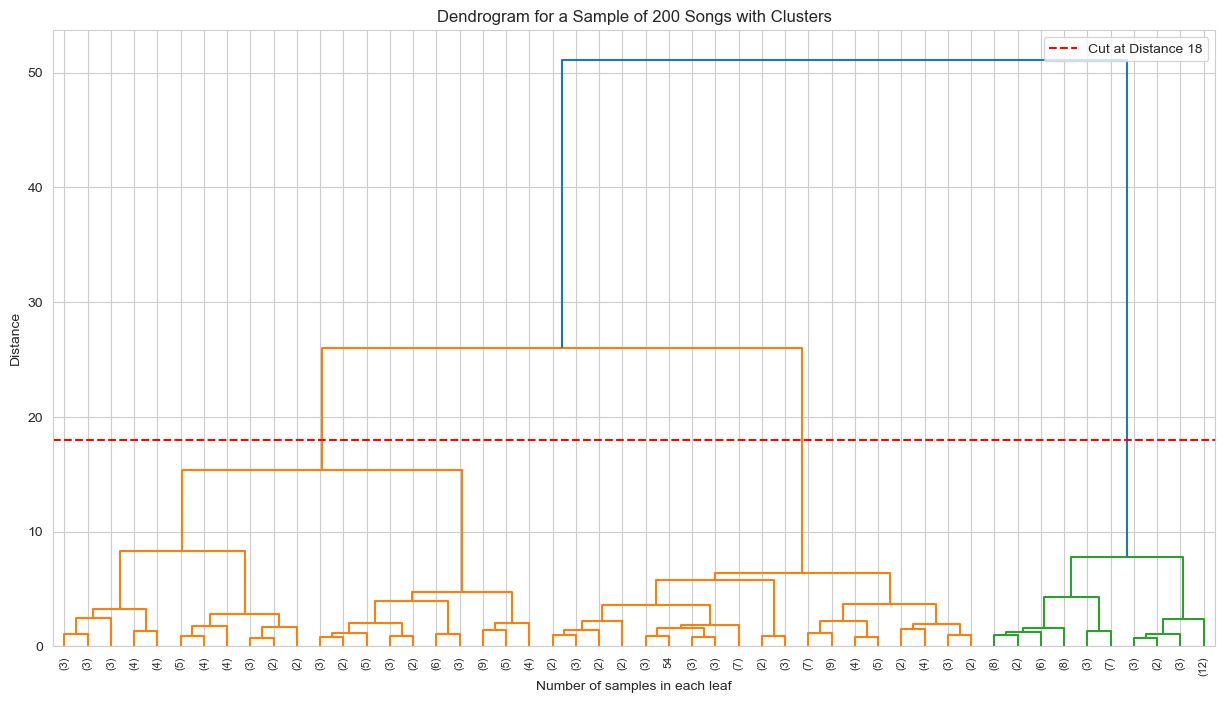

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
sample_size = 200

# Create a sample from the new PCA DataFrame for the dendrogram visualization
pca_data_sample_for_agg = pca_df_qt.sample(n=sample_size, random_state=42)

# Calculate the linkage matrix for visualization
# 'ward' is a common method to minimize the variance within clusters
linked_sample = linkage(pca_data_sample_for_agg, method='ward')

# Plot the dendrogram for the sample
plt.figure(figsize=(15, 8))
dendrogram(linked_sample,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',
           p=50) # Shows only the last 50 clusters

# Add a horizontal line at a specific distance to visualize the cut
# You should adjust this value based on the y-axis of your plot to choose the number of clusters
cut_distance = 18
plt.axhline(y=cut_distance, color='r', linestyle='--', label=f'Cut at Distance {cut_distance}')

plt.title('Dendrogram for a Sample of 200 Songs with Clusters')
plt.xlabel('Number of samples in each leaf')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [38]:
         ┌────────────┐
         │   Merge    │  ← Branch (Verzweigung)
      ┌──┴──┐      ┌──┴──┐
      A     B      C     D   ← Leaves (Blätter)


SyntaxError: invalid character '┌' (U+250C) (3268718517.py, line 1)

In [39]:
from sklearn.cluster import AgglomerativeClustering

# Set the number of clusters based on your dendrogram analysis
n_clusters_agg = 20

# Apply Agglomerative Clustering to the entire pre-processed dataset
# We use 'pca_df_qt' because it contains all 5000 songs, but reduced to 2 dimensions
agg_model = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward')

# Assign the cluster labels to the DataFrame
agg_labels = agg_model.fit_predict(pca_df_qt)
song_numeric_df_cleaned_for_agg.loc[:, 'agg_cluster'] = agg_labels

# Now, check the number of songs in each cluster to confirm the result
print("Number of songs in each of the 3 clusters:")
print(song_numeric_df_cleaned_for_agg['agg_cluster'].value_counts())

Number of songs in each of the 3 clusters:
agg_cluster
1     562
9     474
6     446
2     338
12    328
15    325
11    323
7     278
5     269
0     266
8     225
14    202
16    197
3     196
18    175
17    169
4     121
13    120
10    113
19    108
Name: count, dtype: int64


/var/folders/xn/tw0sz0nx6dv2wmn3xgpg0s0r0000gn/T/ipykernel_11262/180579919.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Number of Songs', data=df_plot, palette='viridis')


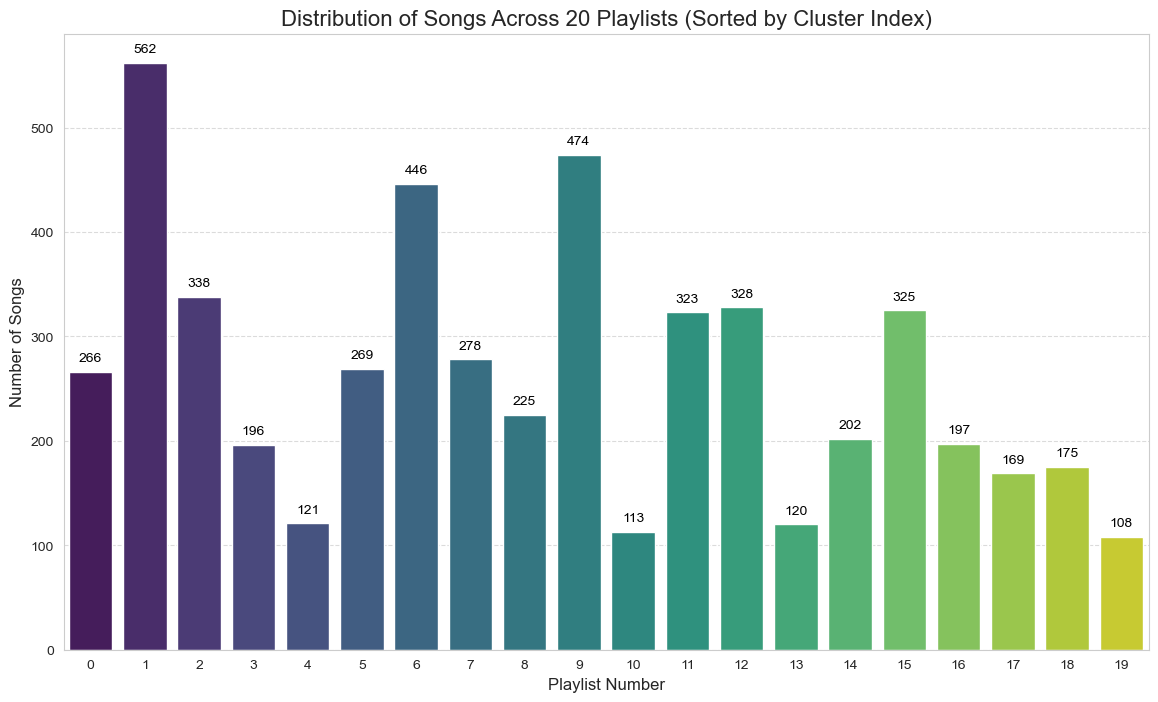

In [40]:
# Recreate the data from your output as a pandas Series
# The data is recreated here for the code to be runnable
cluster_counts = pd.Series([266, 562, 338, 196, 121, 269, 446, 278, 225, 474, 113, 323, 328, 120, 202, 325, 197, 169, 175, 108],
                           index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

# Sort the Series by its index to get the clusters in numerical order
sorted_cluster_counts = cluster_counts.sort_index()

# Create a DataFrame for plotting with seaborn
df_plot = sorted_cluster_counts.reset_index()
df_plot.columns = ['Cluster', 'Number of Songs']

# Create the vertical bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Cluster', y='Number of Songs', data=df_plot, palette='viridis')

# Add annotations to the bars to show the exact number of songs
for index, row in df_plot.iterrows():
    plt.text(row.Cluster, row['Number of Songs'] + 10, int(row['Number of Songs']),
             color='black', ha="center")

plt.title('Distribution of Songs Across 20 Playlists (Sorted by Cluster Index)', fontsize=16)
plt.xlabel('Playlist Number', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()